# Accelerating Insights in the M5 Forecasting Competition with Polars and Functime AI: Unleashing the Power of Efficient Data Preprocessing

### 

#### Introduction
In the fast-paced world of retail analytics, where vast datasets are the norm, efficient data preprocessing is the cornerstone of precise forecasting. In this article, we embark on an journey into the realm of data preprocessing for the M5 Forecasting Competition, utilizing the Walmart dataset. What sets this expedition apart is our choice of the Polars library, a high-performance DataFrame powerhouse together with the functime library built upon the Polars library.

for more in depth descripton of polars --> https://www.pola.rs/
for more in depth description of functime --> https://functime.ai/ 



#### Polars vs. Pandas

##### Polars:
Performance: Polars shines when it comes to speed, particularly with large datasets, thanks to its Rust-based core. This means lightning-fast data manipulations.
Lazy Evaluation: Polars adopts a "lazy evaluation" approach, postponing operations until they're absolutely necessary. This strategy enhances efficiency, especially for intricate data transformations.
Ergonomics: Polars offers a more intuitive and concise API, streamlining the process of expressing complex data operations with less code.
Data Types: Polars excels in handling nullable types, which can be crucial when dealing with missing or incomplete data.
Parallel Processing: To further turbocharge performance, Polars leverages multi-threading for parallel execution of operations.

##### Pandas:
Maturity: Pandas stands as a venerable library with a massive user base. It has been battle-tested over the years.
Ecosystem: The Pandas ecosystem is vast, with community-contributed packages extending its functionality for various data analysis tasks.
Flexibility: Pandas is known for its versatility, capable of handling diverse data sources and formats.
Integration: It seamlessly integrates with other popular data science libraries such as NumPy, Matplotlib, and Scikit-Learn.

In summary, Polars excels in terms of performance, lazy evaluation, and user-friendly design, making it an ideal choice when dealing with large datasets and performance-critical tasks. On the other hand, Pandas offers maturity, a rich ecosystem, and flexibility, making it well-suited for a wide range of data manipulation needs.

We will start with installing and importing our libraries

In [1]:
# install libraries
!pip install --upgrade pip
!pip install polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [2]:
# import libraries
import pandas as pd
import polars as pl
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date

And importing our data

In [4]:


path_sales    = '/Users/fredrik.hornell/Python/Private/Walmart_M5/data/raw/sales_train_evaluation.parquet'
path_calander = '/Users/fredrik.hornell/Python/Private/Walmart_M5/data/raw/calendar.parquet'
path_price    = '/Users/fredrik.hornell/Python/Private/Walmart_M5/data/raw/sell_prices.parquet'

df_sales = pl.read_parquet(path_sales)
df_calendar = pl.read_parquet(path_calander)
df_prices = pl.read_parquet(path_price)

we will start by looking att the sales dataframe

In [5]:
print(df_sales.shape)
print(df_sales.sample(5))

(30490, 1947)
shape: (5, 1_947)
┌────────────────┬───────────────┬─────────────┬───────────┬───┬────────┬────────┬────────┬────────┐
│ id             ┆ item_id       ┆ dept_id     ┆ cat_id    ┆ … ┆ d_1938 ┆ d_1939 ┆ d_1940 ┆ d_1941 │
│ ---            ┆ ---           ┆ ---         ┆ ---       ┆   ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ str            ┆ str           ┆ str         ┆ str       ┆   ┆ i64    ┆ i64    ┆ i64    ┆ i64    │
╞════════════════╪═══════════════╪═════════════╪═══════════╪═══╪════════╪════════╪════════╪════════╡
│ HOUSEHOLD_1_50 ┆ HOUSEHOLD_1_5 ┆ HOUSEHOLD_1 ┆ HOUSEHOLD ┆ … ┆ 0      ┆ 2      ┆ 1      ┆ 0      │
│ 7_TX_3_evaluat ┆ 07            ┆             ┆           ┆   ┆        ┆        ┆        ┆        │
│ io…            ┆               ┆             ┆           ┆   ┆        ┆        ┆        ┆        │
│ HOUSEHOLD_1_36 ┆ HOUSEHOLD_1_3 ┆ HOUSEHOLD_1 ┆ HOUSEHOLD ┆ … ┆ 0      ┆ 1      ┆ 0      ┆ 1      │
│ 3_CA_3_evaluat ┆ 63            ┆             ┆           

the sales dataframe have  shape (30 490, 1 947), whereby the first six columns house the descriptive features of our hierachical dataset. 

Each row in the dataset represents one unique article in on unique store. I will call a unique article store combination for Product location -->  Prodloc going forward.

Each product exists within a department_id i.e dept_id and each dept_id exists within a Category id i.e cat_id

Each Location exists within a State

we will print a sample from each of these six columns to look att the datatype and composistion

In [6]:
print(df_sales.select("id").sample(3))
print(df_sales.select("item_id").sample(3))
print(df_sales.select("dept_id").sample(3))
print(df_sales.select("cat_id").sample(3))
print(df_sales.select("store_id").sample(3))
print(df_sales.select("state_id").sample(3))

shape: (3, 1)
┌─────────────────────────────────┐
│ id                              │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ HOBBIES_1_213_TX_3_evaluation   │
│ HOUSEHOLD_2_454_CA_2_evaluatio… │
│ FOODS_3_056_TX_3_evaluation     │
└─────────────────────────────────┘
shape: (3, 1)
┌─────────────────┐
│ item_id         │
│ ---             │
│ str             │
╞═════════════════╡
│ FOODS_2_095     │
│ FOODS_2_262     │
│ HOUSEHOLD_1_409 │
└─────────────────┘
shape: (3, 1)
┌───────────┐
│ dept_id   │
│ ---       │
│ str       │
╞═══════════╡
│ HOBBIES_1 │
│ FOODS_3   │
│ FOODS_3   │
└───────────┘
shape: (3, 1)
┌───────────┐
│ cat_id    │
│ ---       │
│ str       │
╞═══════════╡
│ HOUSEHOLD │
│ HOBBIES   │
│ FOODS     │
└───────────┘
shape: (3, 1)
┌──────────┐
│ store_id │
│ ---      │
│ str      │
╞══════════╡
│ TX_2     │
│ TX_1     │
│ TX_3     │
└──────────┘
shape: (3, 1)
┌──────────┐
│ state_id │
│ ---      │
│ st

I will transform the dataframe to longformat for easier handeling. df_point_of_sale: will consist of 3 columns ['id', 'date' , 'sales'], and be transformed into long format. We will  cast the sales columns to int16 to reduce amount of memory needed to handle the new dataframe.

In [7]:
# point_of_sale_dataframe
df_point_of_sale = (
    df_sales.lazy()
    .drop(['item_id','dept_id','cat_id','store_id','state_id'])
    .melt(id_vars = 'id')
    .rename({'variable': 'day', 'value': 'sales'})
    .with_columns(
        [
            pl.col('sales').cast(pl.Int16),
        ]
    )
    .join(df_calendar.select(
            [
              pl.col("date") 
            , pl.col("d").alias("day")
            ]
    ).lazy(), on="day", how="inner")
    .drop(['day'])
    .select(
        pl.col('id')
        , pl.col('date')
        , pl.col('sales')
    )
    .collect()
)

print("""df_sales has shape {}\ndf_point_of_sale has shape{} """.format(df_sales.shape, df_point_of_sale.shape))

df_sales has shape (30490, 1947)
df_point_of_sale has shape(59181090, 3) 


In [8]:
# create Prodloc table with prodloc metadata
df_prodloc = (
    df_sales.lazy()
    .select(
        [
             pl.col('id')
            , pl.col('item_id')
            , pl.col('dept_id')
            , pl.col('cat_id')
            , pl.col('store_id')
            , pl.col('state_id')
        ]
    )
    .join(
        df_point_of_sale.lazy()
        , on="id", how="inner"
    )
    .group_by(
        [
             pl.col('id')
            , pl.col('item_id')
            , pl.col('dept_id')
            , pl.col('cat_id')
            , pl.col('store_id')
            , pl.col('state_id')
        ]
    )
    .agg(
        [
             (pl.col("date").filter(pl.col("sales") > 0)).min().alias("first_tran_dt")
            , (pl.col("date").filter(pl.col("sales") > 0 )).max().alias("last_tran_dt")
            , (pl.col("date")).max().alias("dataset_last_dt")
            , pl.col("sales").sum().alias("total_unit_sales")
        ]
    )
    .with_columns(
        (
            pl.col('first_tran_dt')
            .map_elements(lambda x: pl.date_range(x,date(2016, 5, 22), interval="1d", eager=True))
            .alias('timeseries_daterange')
            
        )
    )
    .collect()
)

df_prodloc.shape

/var/folders/vg/gffx6m9j07j37nkdpql4hwr00000gq/T/ipykernel_6177/817129314.py:44: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .collect()


(30490, 11)

In [16]:
df_total_sales = (
    df_point_of_sale.lazy()
    .select(
        pl.col('date').alias('date')
        , pl.col('sales').alias('total_sales')
        )
    .group_by('date')
    .sum()
    .sort(by='date')
    .collect()
)

df_total_sales.plot.line(x="date", y=["total_sales"])

:Curve   [date]   (total_sales)

In [18]:
# plot total sales over region
df_sales_region = (
    df_point_of_sale.lazy()
    .join(
        df_prodloc.lazy()
        .select(pl.col('id'), pl.col('state_id'))
        , on="id", how="inner"
    )
    .group_by('state_id','date')
    .sum()
    .collect()
)
df_sales_region.plot.line(
    x="date"
    , y="sales"
    , by="state_id"
    , 
)


:NdOverlay   [state_id]
   :Curve   [date]   (sales)

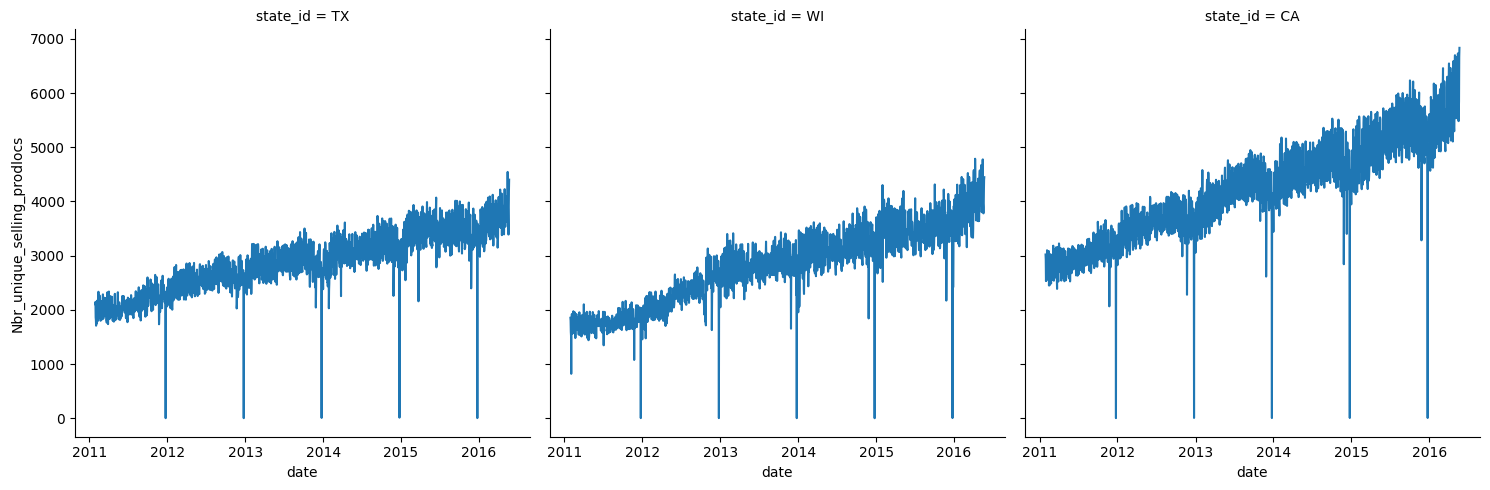

In [ ]:
df_count = (
    df_prodloc.lazy()
    .select([pl.col('id'), pl.col('timeseries_daterange').alias('date')])
    .explode('date')
    .join(
        df_point_of_sale.lazy(), on=['id', 'date'], how='inner'
        )
    .join(
        df_prodloc.lazy().select([pl.col('id'), pl.col('state_id')])
        , on='id', how='inner'
        )
    .group_by('date','state_id')
    .agg(pl.col('id').where(pl.col('sales') > 0).count().alias('Nbr_unique_selling_prodlocs'))
    .collect()
)

sns.relplot(
    data=df_count.to_pandas()
    , x='date'
    , y='Nbr_unique_selling_prodlocs'
    , col='state_id'
    , kind = 'line'
)
df_count = None

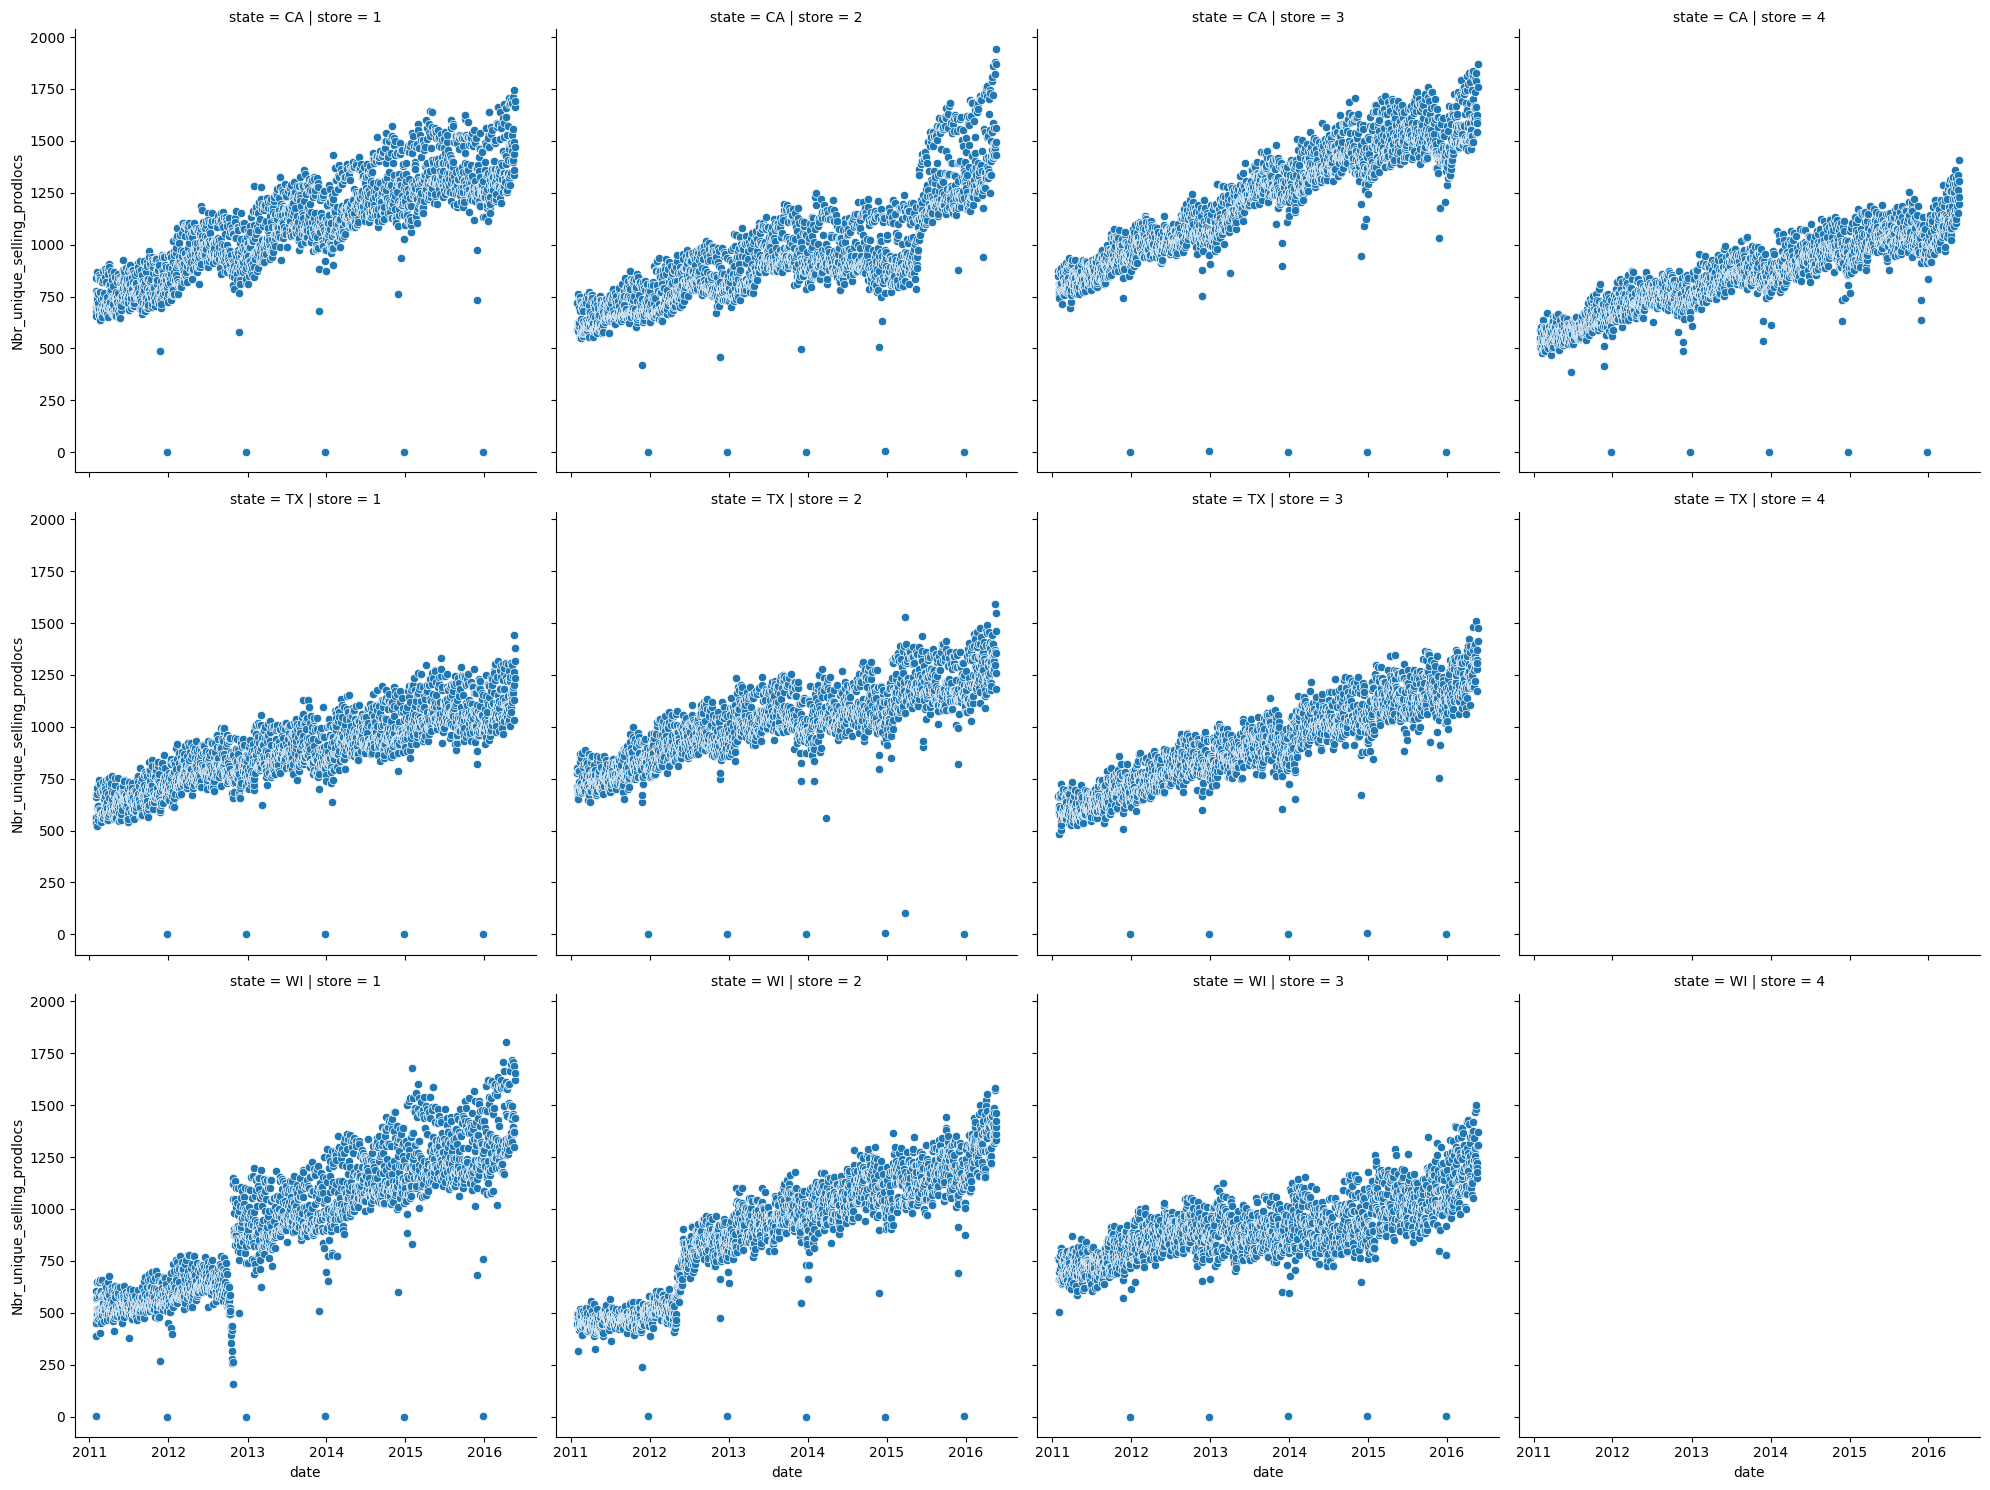

In [ ]:
df_count = (
    df_prodloc.lazy()
    .select([pl.col('id'), pl.col('timeseries_daterange').alias('date')])
    .explode('date')
    .join(
        df_point_of_sale.lazy(), on=['id', 'date'], how='inner'
        )
    .join(
        df_prodloc.lazy().select([pl.col('id'), pl.col('state_id'),pl.col('store_id')])
        , on='id', how='inner'
        )
    .group_by('date','store_id','state_id')
    .agg(
        pl.col('id').where(pl.col('sales') > 0).count().alias('Nbr_unique_selling_prodlocs')
        )
    .with_columns(
        pl.col('store_id')
        .str.split_exact("_", 1)
        .struct.rename_fields(["state", "store"])
        .alias("fields")
    )
    .unnest("fields")
    .sort('date','state', 'store')
    .with_columns(pl.col('date').cumcount().over(pl.col('state'),pl.col('store')).alias('trend'))
    .collect()
)

sns.relplot(
    data=df_count.to_pandas()
    , x='date'
    , y='Nbr_unique_selling_prodlocs'
    , col='store'
    , row='state'
)
df_count = None

Plotting the number of unique selling artikels per store over time tells us 3 things:

- we see an increasing number of unique article selling over time, this means that the store assortment are expanding
- all articles in the dataset are not sold on all stores from day one
- some stores have clear events where the the store assortment suddenly does a major increases 

take aways: 

all timeseries in the dataframe df_point_of_sale are the same lenght. This means that they span the daterange provided in the original sales fram 2011-01-29 to 2016-05-22. The consecvenses of this is a zeroinflated timeseries before the first transaction date. I think that it is reasnoble to assume that an Prodloc timeseries should not include values before its first transaction date.

we will thus transfrom the large df_point_of_sale dataframe to df_point_of_sale_adj by setting each indivudal prodlocs first transaction date as its first datapoint in its timeserie.


In [19]:
df_point_of_sale_adj = (
    df_prodloc.lazy()
    .select([pl.col('id'), pl.col('timeseries_daterange').alias('date')])
    .explode('date')
    .join(df_point_of_sale.lazy(), on=['id', 'date'], how='inner')
    .collect()
)

print(df_point_of_sale.shape)
print(df_point_of_sale_adj.shape)

(59181090, 3)
(46796220, 3)


This decreases the number of datapoints in df_point_of_sale_adj by 20 %.

In [20]:
df_point_of_sale_adj.write_parquet('df_point_of_sale_adj.parquet')
df_point_of_sale.write_parquet('df_point_of_sale.parquet')
df_prodloc.write_parquet('df_prodloc.parquet')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0050dca7-17b3-44cb-a063-ab0f7808e424' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>